**Analyze Epidemic Spread:**

**1.Introduction:**
 This notebook begins with the dataset of infectious disease of SIR model to develop a python program focusing on simplicity and core concept. Manupulating data for ecah class of population and calculating the percentage of populatio over time.Findings from each part of the analysis are summarized in the accompanying README file.

**1.1Preliminaries:** Load the various packages required to complete the task and set up the matplotlib plotting environment.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**2. Data Import and Cleaning**

**2.1Loading dataset from the CSV file**

In [15]:
#Load the data set
df=pd.read_csv("dataset/data.csv")
df.head()

,Day,Susceptible,Infected,Recovered
0,1,985,10,5
1,2,970,20,10
2,3,945,40,15
3,4,910,75,15
4,5,870,110,20


In [8]:
df.tail()

,Day,Susceptible,Infected,Recovered,Change_Susceptible,Change_Infected,Change_Recovered
45,46,476,0,524,0.0,0.0,0.0
46,47,476,0,524,0.0,0.0,0.0
47,48,476,0,524,0.0,0.0,0.0
48,49,476,0,524,0.0,0.0,0.0
49,50,476,0,524,0.0,0.0,0.0


By looking at the rows of last 4 days,we can observe that no body is getting infected. the total population is either susceptible or recovered.

**Ensure all columns have valid numerical data and handle missing values if any**

In [ ]:
df.count()

,0
Day,50
Susceptible,50
Infected,50
Recovered,50


In [9]:
df.describe()

,Day,Susceptible,Infected,Recovered,Change_Susceptible,Change_Infected,Change_Recovered
count,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,25.50000,556.840000,38.280000,404.880000,-10.180000,-0.200000,10.380000
std,14.57738,150.710204,60.563355,188.900864,16.153208,13.507368,16.968025
min,1.00000,476.000000,0.000000,5.000000,-50.000000,-20.000000,0.000000
25%,13.25000,476.000000,0.000000,350.000000,-15.000000,-5.500000,0.000000
50%,25.50000,476.000000,1.500000,522.500000,0.000000,0.000000,0.500000
75%,37.75000,545.000000,56.250000,524.000000,0.000000,0.000000,13.750000
max,50.00000,985.000000,200.000000,524.000000,0.000000,40.000000,60.000000


**3.Data Manipulation**

**3.1Calculate daily changes in the number of Susceptible, Infected, and Recovered individuals**

To calculate the daily changes in the individul population classes we assuming the first row to be of null values and with the use of diff() method we can calculate the difference between each element in the respective column and the element in the previous row

In [ ]:
df['Change_Susceptible']= df['Susceptible'].diff().fillna(0)
df['Change_Infected']=df['Infected'].diff().fillna(0)
df['Change_Recovered']=df['Recovered'].diff().fillna(0)
print(df[['Day','Change_Susceptible','Change_Infected','Change_Recovered']])
df.to_csv('output_with_changes.csv',index=False)

    Day  Change_Susceptible  Change_Infected  Change_Recovered
0     1                 0.0              0.0               0.0
1     2               -15.0             10.0               5.0
2     3               -25.0             20.0               5.0
3     4               -35.0             35.0               0.0
4     5               -40.0             35.0               5.0
5     6               -50.0             40.0              10.0
6     7               -50.0             30.0              20.0
7     8               -50.0             20.0              30.0
8     9               -40.0            -10.0              50.0
9    10               -40.0            -20.0              60.0
10   11               -30.0            -20.0              50.0
11   12               -30.0            -20.0              50.0
12   13               -30.0            -20.0              50.0
13   14               -20.0            -20.0              40.0
14   15               -15.0            -15.0           

This shows that the observation of first 25 days the susceptible population keep decreasing and the numeric value of Change_Susceptible is negative values,after that the number of susceptible population is fixed and hence the difference become null.The Infected population for the first 8 days keep increasing and the difference in the Change_Infected column is positive numeric values for the next 18 days the number of infected population is decreasing and the difference is also negative numerals the rest of the days the population is fixed. In the Change_Recovered column the differences in population for the first 4 days is between 0-0.5 then itranges from 10-50 then forthe rest of the days it keeeps decreasing and becomes null.

**3.2Compute the percentage of the population in each category over time:**

From the dataset we observe that total population of each day is fixed.For each of the categories, we divide the number of individuals in that category by the Total_Population, and multiply by 100 to get the percentage.

In [10]:
total_population=1000.0
df['Percent_Susceptible']=(df['Susceptible']/total_population)*100
df['Percent_Infected']=(df['Infected']/total_population)*100
df['Percent_Recovered']=(df['Recovered']/total_population)*100
df[['Day','Percent_Susceptible','Percent_Infected','Percent_Recovered']]

,Day,Percent_Susceptible,Percent_Infected,Percent_Recovered
0,1,98.5,1.0,0.5
1,2,97.0,2.0,1.0
2,3,94.5,4.0,1.5
3,4,91.0,7.5,1.5
4,5,87.0,11.0,2.0
5,6,82.0,15.0,3.0
6,7,77.0,18.0,5.0
7,8,72.0,20.0,8.0
8,9,68.0,19.0,13.0
9,10,64.0,17.0,19.0


**4.Basic Analysis**

**4.1Identify the day when the number of infected individuals peaked**
Examining the data in the Infected column, we have to determine the day with highest infected population .To do this we are using the max() method on the respected column of the dataframe.

Examining the data in the Infected column, we have to determine the day with highest infected population .To do this we are using the max() method on the respected column of the dataframe.

In [ ]:
peak=df['Infected'].max()
peak

**4.2Calculate the total percentage of the population that became infected during the outbreak**

In [ ]:
tot_per_infec=(df['Infected'].sum()/1000.0)*100
tot_per_infec

**5.Data Visualization**

**5.1Line chart showing trends in Susceptible, Infected, and Recovered populations
over time**

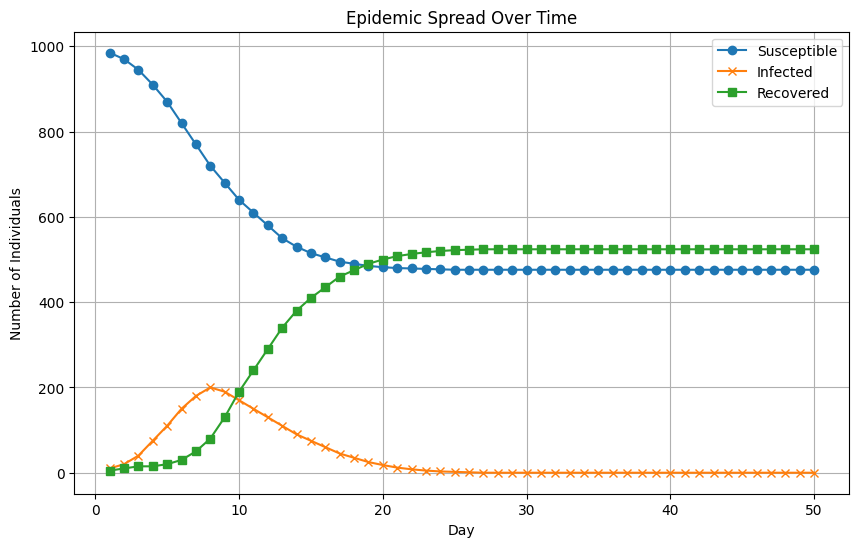

In [12]:
df = pd.read_csv("dataset/data.csv")

# Create the line plot
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(df['Day'], df['Susceptible'], label='Susceptible', marker='o', linestyle='-')
plt.plot(df['Day'], df['Infected'], label='Infected', marker='x', linestyle='-')
plt.plot(df['Day'], df['Recovered'], label='Recovered', marker='s', linestyle='-')

# Add labels and title
plt.xlabel('Day')
plt.ylabel('Number of Individuals')
plt.title('Epidemic Spread Over Time')
plt.legend()
plt.grid(True) # Add grid lines for readability

# Display the plot
plt.show()

The chart is a line graph showing how the number of individuals in three different categories (Susceptible, Infected, and Recovered) changes over time during an epidemic. The x-axis represents time (presumably days), and the y-axis represents the number of individuals.Initially, a large portion of the population is susceptible, while only a small fraction is infected.The number of infected individuals increases sharply as the disease spreads among the susceptible population.The number of infected reaches a peak and then begins to decline, at the same time as the rate at which people become susceptible decreases and the rate of recovered people increases.The number of recovered individuals increases as people recover from the disease.Eventually, the system stabilizes with a large proportion of recovered individuals, a small proportion of susceptible and no infected people.

**5.2Bar chart of daily changes in Infected individuals**

Text(0.5, 1.0, 'Daily Change in Infected Individuals Over Time')

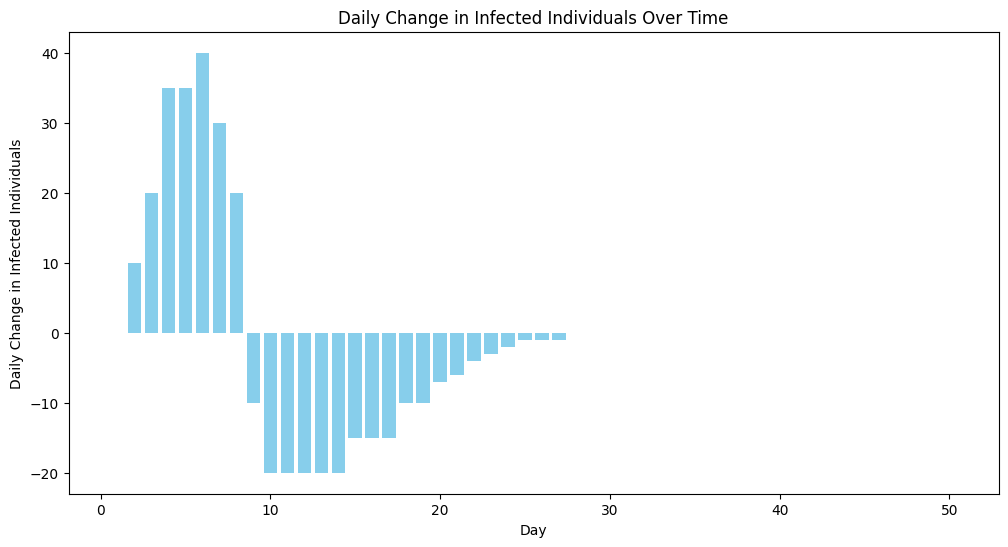

In [13]:
# Load data into pandas DataFrame
df = pd.read_csv("dataset/data.csv")

# Calculate daily changes in infected individuals
df['Change_Infected'] = df['Infected'].diff().fillna(0)

# Create the bar chart
plt.figure(figsize=(12, 6))  # Set the figure size
plt.bar(df['Day'], df['Change_Infected'], color='skyblue')

# Add labels and title
plt.xlabel('Day')
plt.ylabel('Daily Change in Infected Individuals')
plt.title('Daily Change in Infected Individuals Over Time')

This is a bar chart that visualizes the daily change in the number of infected individuals over time. The x-axis represents time (days), and the y-axis represents the number of individuals added to or removed from the infected population each day.The bars are initially positive and increase in height, indicating that the number of new infections is increasing rapidly. This represents the early, rapid spread phase of the epidemic.The bars reach a peak height, indicating the highest daily increase in the number of infected individuals.After the peak, the bars become shorter, then they cross below the x-axis and become negative. This indicates that the number of infected individuals is starting to decrease. The negative values signify that more people are recovering than are newly becoming infected. The absolute value of the bars decreases as the rate of infection stabilizes

**5.3Pie chart showing the final distribution of the population across the three
categories**

(-1.099999662769793,
 1.0999999758692567,
 -1.0999999452440177,
 1.0999999501570255)

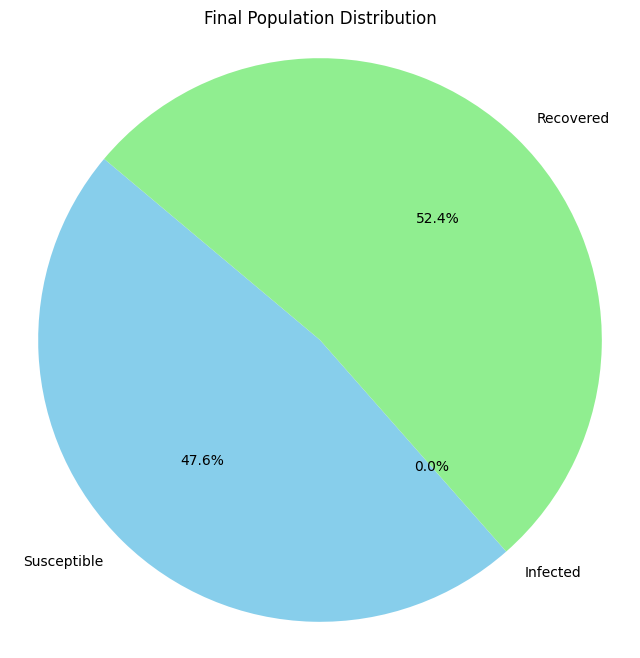

In [14]:
# Load data into pandas DataFrame
df = pd.read_csv("dataset/data.csv")

# Get the final values for each category
final_susceptible = df['Susceptible'].iloc[-1]
final_infected = df['Infected'].iloc[-1]
final_recovered = df['Recovered'].iloc[-1]

# Data for the pie chart
categories = ['Susceptible', 'Infected', 'Recovered']
sizes = [final_susceptible, final_infected, final_recovered]
colors = ['skyblue', 'coral', 'lightgreen']

# Create the pie chart
plt.figure(figsize=(8, 8)) # Set figure size
plt.pie(sizes, labels=categories, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Final Population Distribution')
plt.axis('equal')

This pie chart displays the final distribution of the population across three categories: Susceptible, Infected, and Recovered, at the end of the simulation period. It shows what percentage of the total population belongs to each group after the epidemic has run its course.The largest slice is light green, with a percentage of 52.4%. This indicates that at the end of the simulated epidemic, 52.4% of the population has recovered from the infection.The light blue slice represents 47.6% of the population. This indicates that, even after the epidemic has run its course, there are still a significant number of individuals who remain susceptible to the infection.The coral slice is virtually invisible and is labelled as 0.0%. This indicates that there are no longer any infected individuals at the end of the simulated epidemic.